In [148]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [149]:
data = pd.read_csv('data.csv', delimiter=',')
data.head()

,source_uid,minute,temperature,humidity,pm25,pm10,co2
0,room_0wUPbQvpvb,2023-12-12 08:40:00,24.565000,58.215000,38.5,39.0,949.0
1,room_0wUPbQvpvb,2023-12-12 08:39:00,24.515000,58.299999,33.5,35.5,950.0
2,room_0wUPbQvpvb,2023-12-12 08:38:00,24.520000,58.299999,39.0,39.5,949.0
3,room_0wUPbQvpvb,2023-12-12 08:37:00,24.545000,58.330000,38.5,39.5,949.0
4,room_0wUPbQvpvb,2023-12-12 08:36:00,24.525001,58.414999,36.5,38.0,950.5


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879558 entries, 0 to 879557
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   source_uid   879558 non-null  object 
 1   minute       879558 non-null  object 
 2   temperature  879453 non-null  float64
 3   humidity     879453 non-null  float64
 4   pm25         879453 non-null  float64
 5   pm10         879453 non-null  float64
 6   co2          879453 non-null  float64
dtypes: float64(5), object(2)
memory usage: 47.0+ MB


Заметим, что ненулевых значение не везде одинаковое количество.
Проверим наличие отсутствующих значений в наборе.

In [151]:
for col in data.columns:
  missing = 0
  for a in data[col]:
    if not isinstance(a,str):
      if not np.isfinite(a).all():
        missing += 1
  print('{} - {}%'.format(col, round(missing*100/len(data[col]), 3)))

source_uid - 0.0%
minute - 0.0%
temperature - 0.012%
humidity - 0.012%
pm25 - 0.012%
pm10 - 0.012%
co2 - 0.012%


Заполним недостающе значения численных признаков медиальными значениями для соотвествующего признака.

In [152]:
df_numeric = data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
  med = data[col].median()
  data[col] = data[col].fillna(med)

Проверим, что все недостающие значения действительно заполнились.

In [153]:
for col in data.columns:
  missing = 0
  for a in data[col]:
    if not isinstance(a,str):
      if not np.isfinite(a).all():
        missing += 1
  print('{} - {}%'.format(col, round(missing*100/len(data[col]), 3)))

source_uid - 0.0%
minute - 0.0%
temperature - 0.0%
humidity - 0.0%
pm25 - 0.0%
pm10 - 0.0%
co2 - 0.0%


Выберем одно из помещений, например, room_9zb3VGph0s.
Отобразим таблицу со статистикой по всем показателями для этого помещения.
В таблице указаны следующие параметры: количество наблюдений, среднее, стандартное отклонение, наименьшее, квантили распределения, наибольшее.

In [154]:

data[data['source_uid'] == 'room_9zb3VGph0s'].describe()

,temperature,humidity,pm25,pm10,co2
count,50087.000000,50087.000000,50087.000000,50087.000000,50087.000000
mean,24.111570,63.833603,35.507571,38.777763,598.221123
std,0.781314,4.855819,23.122176,25.411025,220.900741
min,21.170000,41.094999,1.000000,1.000000,388.500000
25%,23.865001,60.505001,18.000000,19.500000,428.500000
50%,24.070000,64.744999,31.500000,34.500000,481.500000
75%,24.335000,67.764167,48.000000,52.500000,750.000000
max,34.820002,76.195000,140.000000,155.500000,1225.500000


Все значения 75% квартиль не сильно отличаются от максимальных значений, а минимальные значения от 25% квартиль. Можем сделать вывод, что в данном наборе нет выбросов.

In [155]:
data['minute'] = data['minute'].apply(
    lambda x: datetime.fromisoformat(x))
data['day'] = data['minute'].apply(
    lambda x: x.strftime('%Y-%m-%d'))
data['only_minute'] = data['minute'].apply(
    lambda x: x.strftime('%H:%M'))
data['only_hour'] = data['minute'].apply(
    lambda x: x.strftime('%H'))

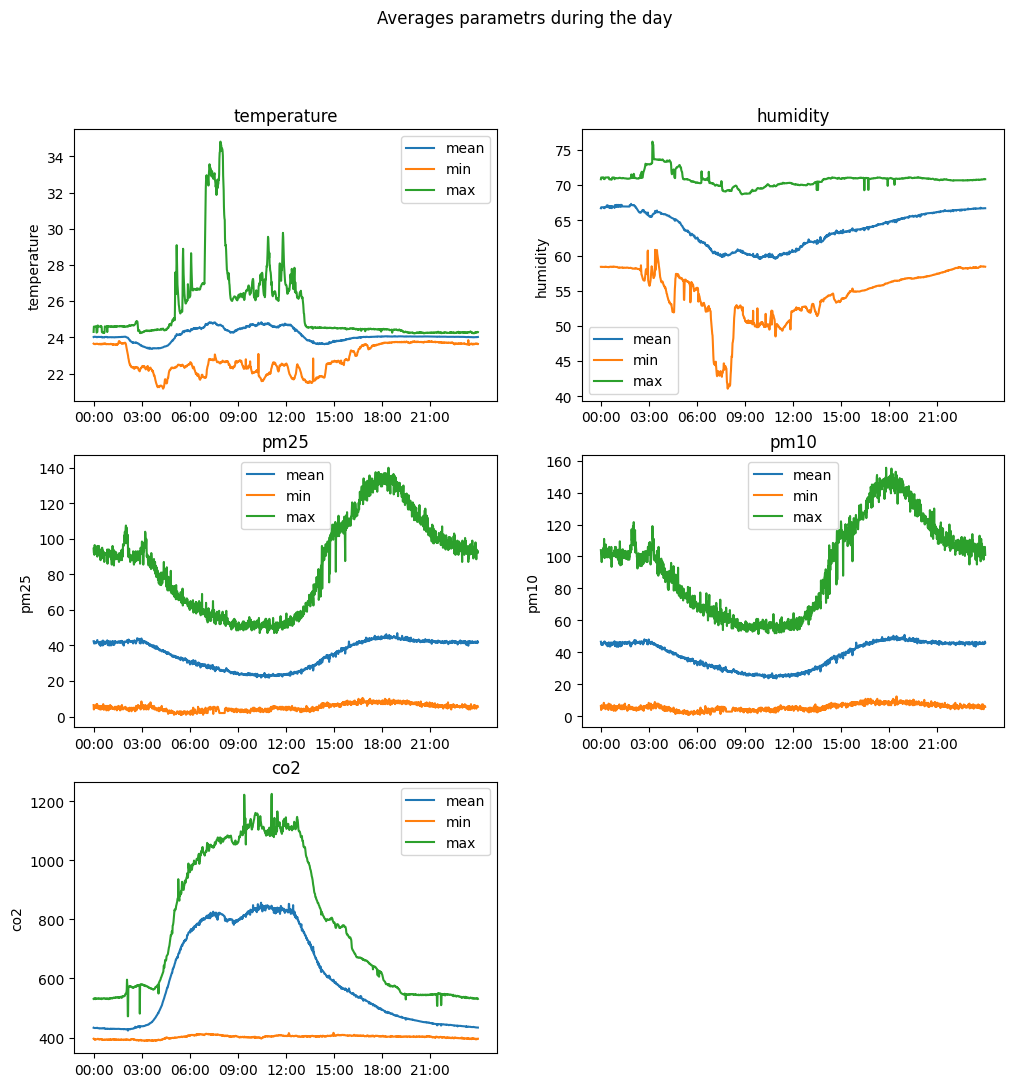

In [156]:
parametrs = ['temperature', 'humidity', 'pm25', 'pm10', 'co2']

plt.figure(figsize=(12,12))
plot_num = 1
for parametr in parametrs:
    plt.subplot (3, 2, plot_num)
    plt.plot(data[data['source_uid'] == 'room_9zb3VGph0s'].groupby('only_minute')[parametr].mean(), label = 'mean')
    plt.plot(data[data['source_uid'] == 'room_9zb3VGph0s'].groupby('only_minute')[parametr].min(), label = 'min')
    plt.plot(data[data['source_uid'] == 'room_9zb3VGph0s'].groupby('only_minute')[parametr].max(), label = 'max')
    plt.legend()
    plt.ylabel(parametr)
    plt.xticks(np.sort(pd.unique(data["only_minute"]))[::180])
    plt.title(parametr)
    plot_num += 1

plt.suptitle('Averages parametrs during the day')
plt.show()


Найдем худьший и лучший день по содержанию pm25 в выбранном помещении.

In [157]:
print('worst', data[data['source_uid'] == 'room_9zb3VGph0s'].groupby('day')['pm25'].mean().sort_values(ascending = False).head(1))
print('best', data[data['source_uid'] == 'room_9zb3VGph0s'].groupby('day')['pm25'].mean().sort_values(ascending = True).head(1))

worst day
2023-11-13    81.85974
Name: pm25, dtype: float64
best day
2023-11-30    6.723894
Name: pm25, dtype: float64


Нарисуем график содержания pm25 по дням в выбранном помещении.

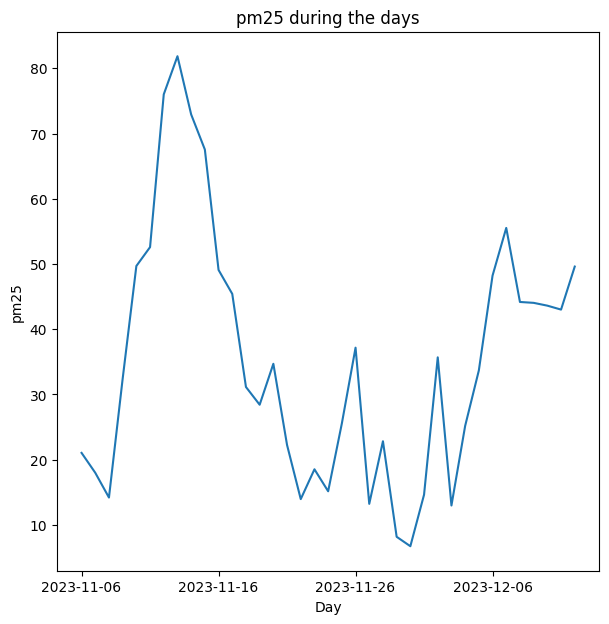

In [158]:
plt.figure(figsize=(7,7))
plt.plot(data[data['source_uid'] == 'room_9zb3VGph0s'].groupby('day')['pm25'].mean())
plt.xlabel('Day')
plt.ylabel('pm25')
plt.xticks(np.sort(pd.unique(data["day"]))[::10])
plt.title('pm25 during the days')
plt.show()


Построим график содержания co2 по дням недели в выбранном помещении.

In [159]:
data['weekday'] = data['minute'].apply(
    lambda x: x.weekday())

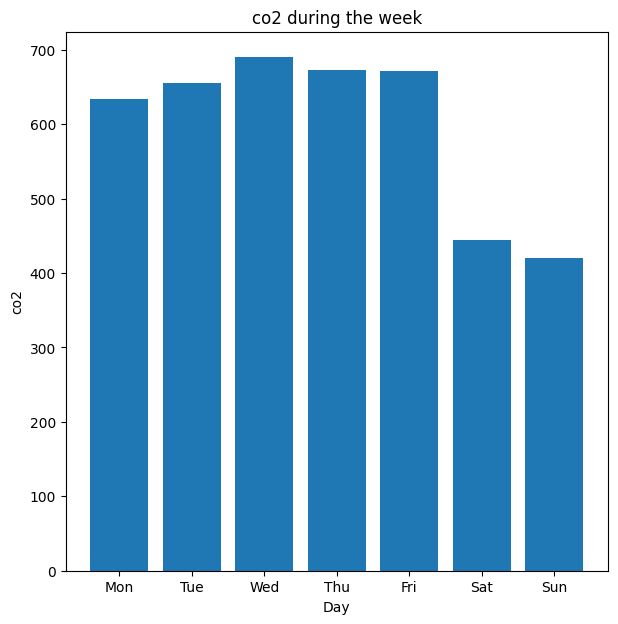

In [160]:
plt.figure(figsize=(7,7))
plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], data[data['source_uid'] == 'room_9zb3VGph0s'].groupby('weekday')['co2'].mean())
plt.xlabel('Day')
plt.ylabel('co2')
plt.title('co2 during the week')
plt.show()

Можно заметить, что среднее содержание co2 в выходные дни (суббота и воскресенье) значительно меньше, чем в рабочие.

Посчитаем корреляцию между признаками. Нарисум матрицу корреляции.

<ipython-input-161-3d52ae8438a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)


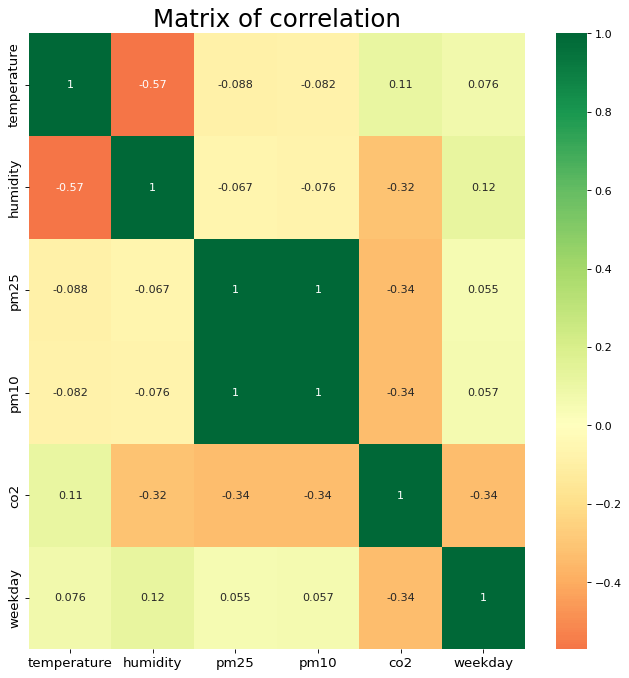

In [161]:
plt.figure(figsize=(10,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Matrix of correlation', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Заметим, что значения pm10 и pm25 имеют очень большое значение корреляции, значит у них в высокой степени наблюдается статистическая взаимосвязь.

Посмотрим это значение и значение p-value более подробно.

In [146]:
from scipy. stats import pearsonr

In [140]:
pearsonr(data['pm10'], data['pm25'])

PearsonRResult(statistic=0.9979043008545774, pvalue=0.0)

In [147]:
pearsonr(data['temperature'], data['humidity'])

PearsonRResult(statistic=-0.5707103118339243, pvalue=0.0)

Для температуры и влажности значение p-value меньше α = 0,05, из чего можно сделать вывод, что корреляция между ними тоже является статистически значимой.

На основе данных определим рабочие часы в офисе.

In [69]:
from work_time_prediction import work_time_prediction

In [73]:
work_hours = work_time_prediction(data)

print(f'I predict that work starts at {work_hours[0]} and ends at {work_hours[1]}.')

I predict that work starts at 4 and ends at 14.
